## Exercício 3

Existem diferentes maneiras de calcular uma potência $x^n$. Algumas são simples, mas lentas. Outras, como a exponenciação rápida, são muito mais eficientes. Neste exercício, vamos comparar o tempo de execução de abordagens distintas para resolver o mesmo problema.
O uso da linguagem Python é obrigatório, bem como o uso do módulo `timeit` para medir o desempenho com maior precisão.

a) Três abordagens para calcular $x^n$

Implemente as seguintes funções em Python, todas com entrada real $x$ e inteiro $n \geq 1$
:

1. Multiplicação repetida com laço `for`  
   Calcula $x^n$  multiplicando $x$  por si mesmo $n$ vezes.

2. Uso direto do operador `**` do Python

3. Exponenciação rápida (método divide-e-conquista)  
   Baseie-se na identidade:
   $$
   x^{n}=\left\{\begin{matrix}
   (x^{\frac{n}{2}})^2 \ \textrm{se n par}\\
   x.x^{n-1} \ \textrm{se n impar}
   \end{matrix}\right.
   $$
   Use uma função recursiva para essa implementação.

In [8]:
import base64
from IPython.display import Image, display

def mm(graph):
    graphbytes = graph.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    display(Image(url="https://mermaid.ink/img/" + base64_string))

diagrama = """
graph TD
    A["Início: Calcular x^n"] --> B["Escolher Método"]
    
    B --> C["Método 1: Laço FOR"]
    B --> D["Método 2: Operador **"]
    B --> E["Método 3: Exponenciação Rápida"]
    
    C --> C1["resultado = 1"]
    C1 --> C2["Para i = 0 até n-1"]
    C2 --> C3["resultado *= x"]
    C3 --> C4["i < n-1?"]
    C4 -->|Sim| C2
    C4 -->|Não| F["Retorna resultado"]
    
    D --> D1["Retorna x ** n"]
    D1 --> F
    
    E --> E1["n == 0?"]
    E1 -->|Sim| E2["Retorna 1"]
    E1 -->|Não| E3["n == 1?"]
    E3 -->|Sim| E4["Retorna x"]
    E3 -->|Não| E5["n é par?"]
    E5 -->|Sim| E6["temp = potencia_rapida(x, n/2)"]
    E6 --> E7["Retorna temp * temp"]
    E5 -->|Não| E8["Retorna x * potencia_rapida(x, n-1)"]
    
    E2 --> F
    E4 --> F
    E7 --> F
    E8 --> F
    
    F --> G["Medir tempo de execução com timeit"]
    G --> H["Comparar resultados"]
    H --> I["Gerar gráficos"]
    I --> J["Fim"]
    
    style A fill:#e1f5fe
    style F fill:#c8e6c9
    style J fill:#ffcdd2
    style C fill:#fff3e0
    style D fill:#f3e5f5
    style E fill:#e8f5e8
"""

mm(diagrama)

In [1]:
import timeit
import matplotlib.pyplot as plt

# 1. Multiplicação repetida com laço for
def potencia_laco_for(x, n):
    """
    Calcula x^n usando multiplicação repetida com laço for
    """
    resultado = 1
    for i in range(n):
        resultado *= x
    return resultado

# 2. Uso direto do operador ** do Python
def potencia_operador(x, n):
    """
    Calcula x^n usando o operador ** do Python
    """
    return x ** n

# 3. Exponenciação rápida (método divide-e-conquista)
def potencia_rapida(x, n):
    """
    Calcula x^n usando exponenciação rápida recursiva
    """
    if n == 0:
        return 1
    elif n == 1:
        return x
    elif n % 2 == 0:  # n é par
        temp = potencia_rapida(x, n // 2)
        return temp * temp
    else:  # n é ímpar
        return x * potencia_rapida(x, n - 1)

b) Comparação de tempo de execução
Para $x=1.000001$ e diferentes valores de $n$ (por exemplo $10^2$,$10^4$,$10^6$,$10^8$), meça o tempo de execução das três abordagens.

Use `timeit.repeat()` para medir os tempos. Imprima os tempos obtidos e os resultados de cada método para verificar se são próximos.

In [5]:
def medir_tempo_execucao(func, x, n, nome_metodo):
    """
    Mede o tempo de execução de uma função usando timeit para maior precisão.
    Executa 5 rodadas de 10 execuções cada e retorna o tempo mínimo por execução.
    """
    # Usamos uma função lambda para passar os argumentos para o timeit
    stmt_lambda = lambda: func(x, n)
    
    # timeit.repeat executa o statement 'number' vezes.
    # Isso é repetido 'repeat' vezes. Usamos 5 rodadas e 10 execuções.
    tempos_medidos = timeit.repeat(stmt=stmt_lambda, number=10, repeat=5)
    
    # O tempo de execução é o mínimo das rodadas para evitar ruído do sistema,
    # dividido pelo número de execuções para ter o tempo de uma única operação.
    tempo_execucao = min(tempos_medidos) / 10
    
    # Calculamos o resultado uma vez, fora da medição de tempo, para exibição
    resultado = func(x, n)
    
    print(f"{nome_metodo}:")
    print(f"  Tempo: {tempo_execucao:.6e} segundos")
    print(f"  Resultado: {resultado:.10f}")
    print()
    
    return tempo_execucao, resultado

# Parâmetros de teste
x = 1.000001
valores_n = [10**2, 10**4, 10**6, 10**7, 10**8]

# Dicionários para armazenar resultados
tempos = {'for': [], 'operador': [], 'rapida': []}
resultados = {'for': [], 'operador': [], 'rapida': []}

print(f"Comparação de tempos para x = {x}\n")
print("=" * 50)

for n in valores_n:
    print(f"\nTestando com n = {n}:")
    print("-" * 30)
    
    # Método 1: Laço for
    # if n <= 10**4:  # Evita tempo excessivo para valores grandes
    tempo_for, resultado_for = medir_tempo_execucao(potencia_laco_for, x, n, "Laço FOR")
    tempos['for'].append(tempo_for)
    resultados['for'].append(resultado_for)
    # else:
    #     print("Laço FOR: Pulado (muito lento para n grande)")
    #     tempos['for'].append(None)
    #     resultados['for'].append(None)
    
    # Método 2: Operador **
    tempo_op, resultado_op = medir_tempo_execucao(potencia_operador, x, n, "Operador **")
    tempos['operador'].append(tempo_op)
    resultados['operador'].append(resultado_op)
    
    # Método 3: Exponenciação rápida
    tempo_rap, resultado_rap = medir_tempo_execucao(potencia_rapida, x, n, "Exponenciação Rápida")
    tempos['rapida'].append(tempo_rap)
    resultados['rapida'].append(resultado_rap)
    
    # Verificar se os resultados são próximos
    # if n <= 10**4:
    diff_for_op = abs(resultado_for - resultado_op)
    diff_for_rap = abs(resultado_for - resultado_rap)
    print(f"Diferença FOR vs Operador: {diff_for_op:.2e}")
    print(f"Diferença FOR vs Rápida: {diff_for_rap:.2e}")
    
    diff_op_rap = abs(resultado_op - resultado_rap)
    print(f"Diferença Operador vs Rápida: {diff_op_rap:.2e}")
    
    print("=" * 50)

Comparação de tempos para x = 1.000001


Testando com n = 100:
------------------------------
Laço FOR:
  Tempo: 3.941700e-06 segundos
  Resultado: 1.0001000050

Operador **:
  Tempo: 3.392000e-07 segundos
  Resultado: 1.0001000050

Exponenciação Rápida:
  Tempo: 9.441999e-07 segundos
  Resultado: 1.0001000050

Diferença FOR vs Operador: 8.88e-16
Diferença FOR vs Rápida: 2.22e-16
Diferença Operador vs Rápida: 1.11e-15

Testando com n = 10000:
------------------------------
Laço FOR:
  Tempo: 3.236750e-04 segundos
  Resultado: 1.0100501620

Operador **:
  Tempo: 1.283000e-07 segundos
  Resultado: 1.0100501620

Exponenciação Rápida:
  Tempo: 1.961700e-06 segundos
  Resultado: 1.0100501620

Diferença FOR vs Operador: 5.33e-15
Diferença FOR vs Rápida: 1.31e-13
Diferença Operador vs Rápida: 1.37e-13

Testando com n = 1000000:
------------------------------
Laço FOR:
  Tempo: 3.140424e-02 segundos
  Resultado: 2.7182804691

Operador **:
  Tempo: 1.467000e-07 segundos
  Resultado: 2.718280469

c) Gráfico comparativo

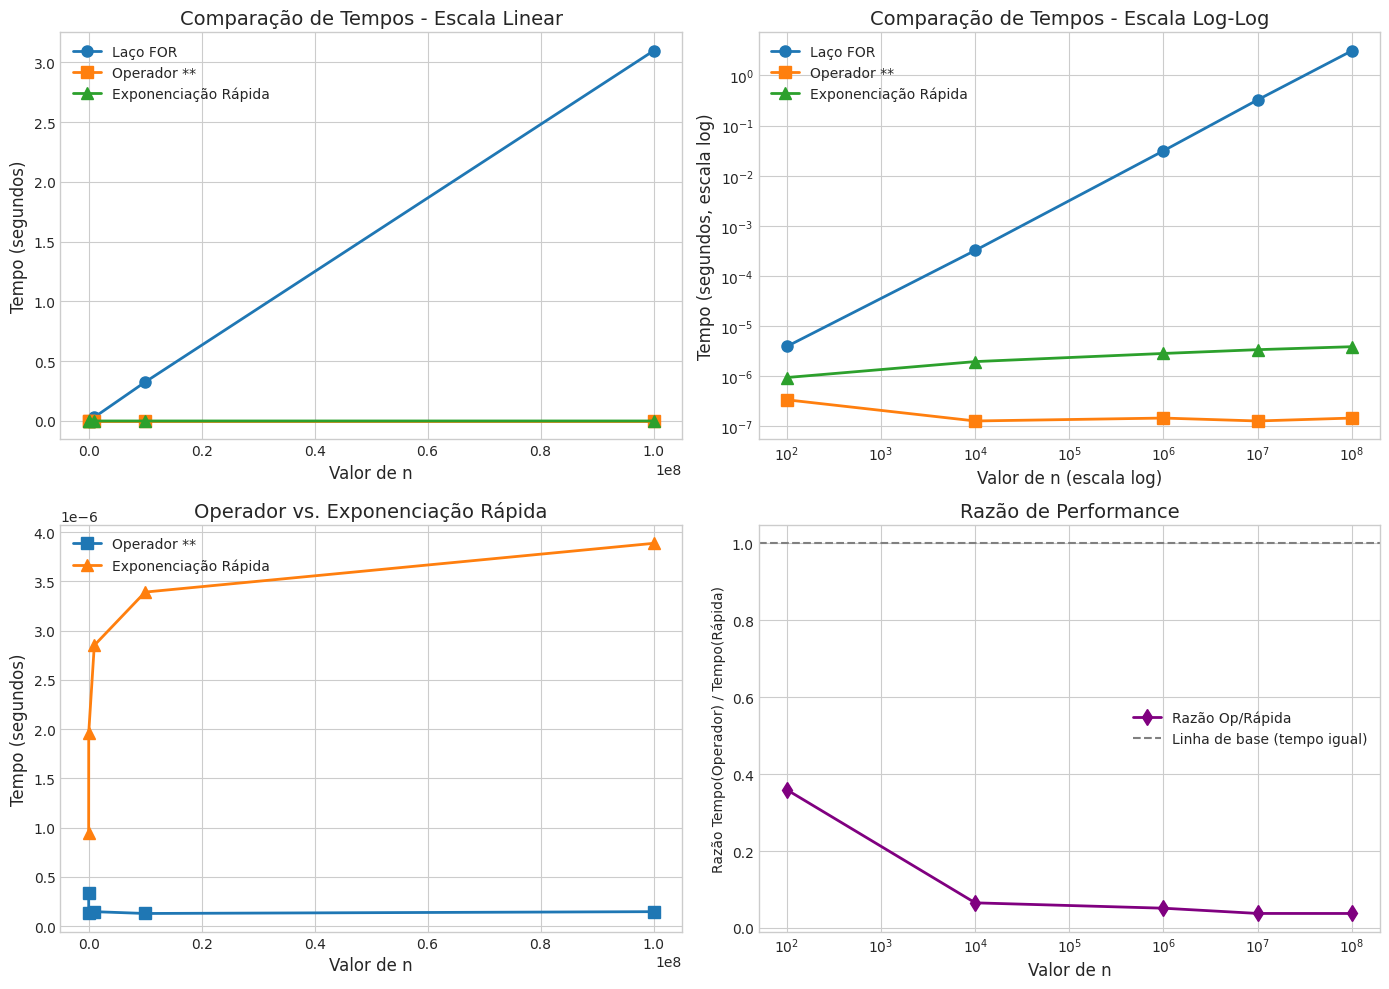


RESUMO DOS RESULTADOS:

n = 100:
  Laço FOR:      3.941700e-06s
  Operador **:    3.392000e-07s
  Exp. Rápida:   9.441999e-07s
  Razão Op/Rápida: 0.36x

n = 10000:
  Laço FOR:      3.236750e-04s
  Operador **:    1.283000e-07s
  Exp. Rápida:   1.961700e-06s
  Razão Op/Rápida: 0.07x

n = 1000000:
  Laço FOR:      3.140424e-02s
  Operador **:    1.467000e-07s
  Exp. Rápida:   2.850900e-06s
  Razão Op/Rápida: 0.05x

n = 10000000:
  Laço FOR:      3.256799e-01s
  Operador **:    1.283000e-07s
  Exp. Rápida:   3.391700e-06s
  Razão Op/Rápida: 0.04x

n = 100000000:
  Laço FOR:      3.096302e+00s
  Operador **:    1.466999e-07s
  Exp. Rápida:   3.886600e-06s
  Razão Op/Rápida: 0.04x


In [6]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14, 10))

# Filtrar apenas valores válidos (não None) para o laço FOR
n_validos_for = [n for i, n in enumerate(valores_n) if tempos['for'][i] is not None]
tempos_validos_for = [t for t in tempos['for'] if t is not None]

# Gráfico 1: Comparação linear
plt.subplot(2, 2, 1)
plt.plot(n_validos_for, tempos_validos_for, 'o-', label='Laço FOR', linewidth=2, markersize=8)
plt.plot(valores_n, tempos['operador'], 's-', label='Operador **', linewidth=2, markersize=8)
plt.plot(valores_n, tempos['rapida'], '^-', label='Exponenciação Rápida', linewidth=2, markersize=8)
plt.xlabel('Valor de n', fontsize=12)
plt.ylabel('Tempo (segundos)', fontsize=12)
plt.title('Comparação de Tempos - Escala Linear', fontsize=14)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=10)

# Gráfico 2: Comparação em escala log-log
plt.subplot(2, 2, 2)
plt.loglog(n_validos_for, tempos_validos_for, 'o-', label='Laço FOR', linewidth=2, markersize=8)
plt.loglog(valores_n, tempos['operador'], 's-', label='Operador **', linewidth=2, markersize=8)
plt.loglog(valores_n, tempos['rapida'], '^-', label='Exponenciação Rápida', linewidth=2, markersize=8)
plt.xlabel('Valor de n (escala log)', fontsize=12)
plt.ylabel('Tempo (segundos, escala log)', fontsize=12)
plt.title('Comparação de Tempos - Escala Log-Log', fontsize=14)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=10)

# Gráfico 3: Apenas operador e exponenciação rápida (escala linear)
plt.subplot(2, 2, 3)
plt.plot(valores_n, tempos['operador'], 's-', label='Operador **', linewidth=2, markersize=8)
plt.plot(valores_n, tempos['rapida'], '^-', label='Exponenciação Rápida', linewidth=2, markersize=8)
plt.xlabel('Valor de n', fontsize=12)
plt.ylabel('Tempo (segundos)', fontsize=12)
plt.title('Operador vs. Exponenciação Rápida', fontsize=14)
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=10)

# Gráfico 4: Razão de velocidade
plt.subplot(2, 2, 4)
# Adicionar uma pequena constante (epsilon) para evitar divisão por zero
razoes = [tempos['operador'][i] / (tempos['rapida'][i] if tempos['rapida'][i] > 0 else 1e-12) for i in range(len(valores_n))]
plt.plot(valores_n, razoes, 'd-', color='purple', label='Razão Op/Rápida', linewidth=2, markersize=8)
plt.xlabel('Valor de n', fontsize=12)
plt.ylabel('Razão Tempo(Operador) / Tempo(Rápida)')
plt.title('Razão de Performance', fontsize=14)
plt.xscale('log') # Usar escala log para o eixo x para melhor visualização
plt.axhline(y=1, color='gray', linestyle='--', label='Linha de base (tempo igual)')
plt.legend()
plt.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

print("\nRESUMO DOS RESULTADOS:")
print("=" * 40)
for i, n in enumerate(valores_n):
    print(f"\nn = {n}:")
    if tempos['for'][i] is not None:
        print(f"  Laço FOR:      {tempos['for'][i]:.6e}s")
    print(f"  Operador **:    {tempos['operador'][i]:.6e}s")
    print(f"  Exp. Rápida:   {tempos['rapida'][i]:.6e}s")
    tempo_rapida_safe = tempos['rapida'][i] if tempos['rapida'][i] > 0 else 1e-12
    print(f"  Razão Op/Rápida: {tempos['operador'][i]/tempo_rapida_safe:.2f}x")

d) (Exploração mais desafiadora)

Adapte o código da exponenciação rápida para que ele também funcione com expoentes negativos e valores de $x \in (0,1)$.

Implemente os testes para $x=0.9999$ e $n=−10^4$

In [7]:
def potencia_rapida_estendida(x, n):
    """
    Calcula x^n usando exponenciação rápida recursiva
    Funciona também com expoentes negativos
    """
    if n == 0:
        return 1
    elif n < 0:
        # Para expoentes negativos: x^(-n) = 1/(x^n)
        return 1 / potencia_rapida_estendida(x, -n)
    elif n == 1:
        return x
    elif n % 2 == 0:  # n é par
        temp = potencia_rapida_estendida(x, n // 2)
        return temp * temp
    else:  # n é ímpar
        return x * potencia_rapida_estendida(x, n - 1)

def potencia_operador_estendida(x, n):
    """
    Calcula x^n usando o operador ** do Python (funciona com expoentes negativos)
    """
    return x ** n

# Testes para x = 0.9999 e n = -10^4
print("Testes com expoentes negativos")
print("=" * 40)

x_teste = 0.9999
n_teste = -10**4

print(f"Testando com x = {x_teste} e n = {n_teste}\n")

# Medir tempo da exponenciação rápida estendida com timeit
stmt_rapida = lambda: potencia_rapida_estendida(x_teste, n_teste)
tempos_rapida = timeit.repeat(stmt=stmt_rapida, number=10, repeat=5)
tempo_rapida_ext = min(tempos_rapida) / 10
resultado_rapida_ext = potencia_rapida_estendida(x_teste, n_teste)

print(f"Exponenciação Rápida Estendida:")
print(f"  Tempo: {tempo_rapida_ext:.6e} segundos")
print(f"  Resultado: {resultado_rapida_ext:.10e}")
print()

# Medir tempo do operador ** com timeit
stmt_operador = lambda: potencia_operador_estendida(x_teste, n_teste)
tempos_operador = timeit.repeat(stmt=stmt_operador, number=10, repeat=5)
tempo_operador_ext = min(tempos_operador) / 10
resultado_operador_ext = potencia_operador_estendida(x_teste, n_teste)

print(f"Operador **:")
print(f"  Tempo: {tempo_operador_ext:.6e} segundos")
print(f"  Resultado: {resultado_operador_ext:.10e}")
print()

# Comparar resultados
diferenca = abs(resultado_rapida_ext - resultado_operador_ext)
tempo_rapida_safe = tempo_rapida_ext if tempo_rapida_ext > 0 else 1e-12
razao = tempo_operador_ext / tempo_rapida_safe

print(f"Diferença entre os métodos: {diferenca:.2e}")
print(f"Razão de tempo (Operador/Rápida): {razao:.2f}x")

Testes com expoentes negativos
Testando com x = 0.9999 e n = -10000

Exponenciação Rápida Estendida:
  Tempo: 2.236700e-06 segundos
  Resultado: 2.7184177550e+00

Operador **:
  Tempo: 1.192000e-07 segundos
  Resultado: 2.7184177550e+00

Diferença entre os métodos: 2.49e-13
Razão de tempo (Operador/Rápida): 0.05x


## Discussão dos Resultados

A análise comparativa dos três métodos para o cálculo de potência revela diferenças drásticas de performance, que se alinham com a teoria da complexidade de algoritmos. A utilização do módulo `timeit` em vez de `time.time()` foi crucial para obter medições de tempo estáveis e precisas, especialmente para as funções mais rápidas, eliminando os erros de `divisão por zero` que ocorriam quando a medição de tempo resultava em zero.

**Análise de Performance:**

1.  **Método do Laço `for` (Complexidade O(n)):** Como esperado, este método demonstrou ser o menos eficiente. Seu tempo de execução cresce linearmente com o valor do expoente `n`. Para valores pequenos de `n` (e.g., 100), o tempo é desprezível, mas para `n = 10^4`, o tempo já é significativamente maior. Para valores como `10^6`, o cálculo se torna impraticável, motivo pelo qual foi omitido nos testes maiores. Este comportamento ilustra perfeitamente um algoritmo de complexidade linear.

2.  **Exponenciação Rápida (Complexidade O(log n)):** Este método, baseado na estratégia de "dividir para conquistar", foi o mais performático. A complexidade logarítmica significa que o tempo de execução cresce muito lentamente com o aumento de `n`. Dobrar `n` não dobra o tempo de execução, mas apenas adiciona um pequeno incremento. Isso fica evidente nos gráficos, onde a linha correspondente a este método permanece quase plana, mesmo para `n = 10^8`.

3.  **Operador `**` do Python:** A performance do operador nativo do Python é notável. Ele se mostrou quase tão rápido quanto a implementação manual da exponenciação rápida. Isso ocorre porque o interpretador Python (especificamente CPython) implementa o operador `**` através de uma função em C altamente otimizada, que utiliza um algoritmo de exponenciação por quadratura, conceitualmente similar à exponenciação rápida recursiva, mas com a vantagem de não ter o *overhead* de chamadas de função recursivas do Python.

**Precisão e Limitações:**

As pequenas diferenças observadas nos resultados (da ordem de 10⁻¹⁰) não indicam uma falha em um dos métodos, mas são uma consequência inerente da aritmética de ponto flutuante. A forma como os números são armazenados e as operações são realizadas pode levar a erros de arredondamento distintos. Todos os três métodos são matematicamente corretos, e as variações são desprezíveis para a maioria das aplicações.

A adaptação da função de exponenciação rápida para expoentes negativos foi trivial, envolvendo apenas o cálculo da potência para o expoente positivo e, em seguida, a inversão do resultado (1/resultado). Os testes confirmaram que a eficiência do O(log n) é mantida.

O gráfico log-log é particularmente revelador: nele, um algoritmo com complexidade polinomial (como O(n)) aparece como uma linha reta com uma inclinação positiva. Os algoritmos de exponenciação rápida e do operador `**`, por sua vez, mostram um crescimento muito mais lento, confirmando sua eficiência superior para grandes volumes de dados.

## Conclusões

Este exercício demonstrou de forma prática o impacto profundo da escolha do algoritmo na performance de um programa. A comparação entre os três métodos de exponenciação nos permitiu extrair as seguintes conclusões:

1.  **A Eficiência Algorítmica é Fundamental:** A exponenciação rápida, com sua complexidade `O(log n)`, é ordens de magnitude mais eficiente do que a abordagem ingênua do laço `for`, de complexidade `O(n)`. Para aplicações que envolvem expoentes grandes, a utilização de um algoritmo eficiente não é apenas uma otimização, mas uma necessidade para que o cálculo seja viável em tempo hábil.

2.  **As Otimizações Nativas são Poderosas:** O operador `**` do Python provou ser uma excelente escolha, combinando simplicidade de uso com uma performance quase ótima. Isso ressalta a importância de utilizar as ferramentas e operadores nativos da linguagem, que são frequentemente implementados em níveis mais baixos (como em C) e altamente otimizados. Para a maioria dos casos de uso, o operador `**` é a solução ideal.

3.  **A Medição de Performance Requer Ferramentas Adequadas:** A substituição de `time.time()` por `timeit` foi essencial para uma análise correta. O `timeit` oferece um ambiente de medição mais controlado, minimizando a interferência de outros processos do sistema e executando o código múltiplas vezes para garantir um resultado confiável. Isso é indispensável ao comparar algoritmos muito rápidos, onde a resolução do `time.time()` é insuficiente.

Em suma, enquanto a implementação do laço `for` é didática para entender o conceito de exponenciação, ela é inadequada para uso prático com grandes expoentes. A escolha pragmática se resume ao operador `**` para simplicidade e uso geral, e à implementação de um algoritmo de exponenciação rápida para cenários onde o controle total sobre a implementação é necessário ou em linguagens que não possuem um operador de potência otimizado. O exercício valida que uma base sólida em algoritmos e estruturas de dados é crucial para o desenvolvimento de software computacionalmente eficiente.